# 1. When to use ML and when not to(upto 500 words)

Machine learning is a computer program/algorithm that uses statistics to find inferences, predict things or find patterns from the data.A company should not use ML only because its trendy.There are different steps to be followed before machine algorithm is implemented. ML is not the first step in any business situation. We need to look into following things:
- Business situation  - 5% increase in churn, 7% increase in fraud 
- Business opportunity - cause benefit analysis. asking inference questions like why,which, how. Prediction questions like can we identify,predict or flag something? e.g reduce churn hence mitigate the revenue, reduce % fraud detection
- Business action - e.g sending promotional emails for churn reduction

When above mentioned analysis is done and when business and team thinks there is situation where potentional ML can help, it is important that you have enough data which has this order. If the steps before starting ML are not followed, garbage in and garbage out will happen.

    6.ML in production
    5.Prototyping and Testing ML
    4.Analysis
    3.Prepare and clean 
    2.Storage
    1.Collect 

Does the organization has team that has expertise in those areas like DBA,data engineers, data anlalyst, Data scientist and ML engineers? Discuss what kind of ML fits the business situation. Does it need supervised or unsupervised learning?
Supervised learning, where there is labelled input and labelled output.
- classification(discrete), Regression(Continuous)
- Inference(Causal)
- Predict
- finding the labelled data and target label
e.g used in financial, banking systems

unsupervised learning - there is no labelled input or output data
- Pattern detection
- outlier detection
- Clustering
- Recommender engine
 e.g used in marketing systems

Does company have clear and realistic way of measuring the success of ML. What are the criteria for accurary, recall and precision. 
- Accuracy- How far from prediction?
- recall - how much it captures
- precision - how much turned out to be true

Model performance and outcome:
Test if using models helps improve outcomes:Did this result in decreased churn,increased purchase rate?If yes,build into automated process.If no,collect more data,improve models,and test again.

If the above mentioned requirements are not met, it is very less likely that ML will help for business situation.If the ML algorithm doesn't improve the business situation then ML was not successful in that scenario.
ML is not feasible
- When solving less complex problems. For less complex problems, if rule-based system is giving performance comparable to machine learning system, then it is advisable to avoid ML
- Lack of labelled data and in house expertise

In [1]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#load dataset
loan_df = pd.read_csv("loans_full_schema.csv")
#to plot region wise loan_amount plot at the end
region_df = loan_df
loan_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

# 2. Pre-processing on lending dataset

## 1.Cleaning up null values

In [4]:
"""
#null values
emp_title                            833 - replace with text 'Not reported'
emp_length                           817 - 0
debt_to_income                        24 - replace with mean value of debt_to_income

#In these columns, 85% of data is null and hence can not be predicted/interapolated with other values or can not be used in analysis
#annual_income_joint                 8505
#verification_income_joint           8545
#debt_to_income_joint                8505

#
months_since_last_delinq            5658 
months_since_90d_late               7715 
months_since_last_credit_inquiry    1271 
num_accounts_120d_past_due           318 
"""
#Show count of null values
loan_df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [5]:
print(loan_df["months_since_last_credit_inquiry"].mean())
print(loan_df["num_accounts_120d_past_due"].mean())
print(loan_df["months_since_last_delinq"].mode())
print(loan_df["months_since_90d_late"].mode())


7.340703402451598
0.0
0    25.0
dtype: float64
0    34.0
dtype: float64


In [6]:
#emp_title column has 833 values that are null, replace it with text 'Not Reported'
#emp_length column has 817 values that are null, replace it with 0
#debt_to_income column has 24 null values, replace it with its  mean value


loan_df.fillna({"emp_title":"Not Reported",
                "emp_length":0,
                "debt_to_income":loan_df["debt_to_income"].mean(),
                "num_accounts_120d_past_due":loan_df["num_accounts_120d_past_due"].mean(),
                "months_since_last_credit_inquiry":loan_df["months_since_last_credit_inquiry"].mean(),
                "months_since_last_delinq":0,
                "months_since_90d_late":0},inplace=True)
               

In [7]:
#for application type 'individual' annual_income_joint, verification_income_joint, debt_to_income_joint is not repoted
#or is null. These values are reported only when application type is joint. 

#One approach could be only divinding the dataset innto individual and Joint application type for analysis
## We could set debt_to_income_joint to 0 for application type 'individual' 
## loan_df.loc[(loan_df["application_type"]=="individual"),['debt_to_income_joint']] = 0
## We could replace verification_income_joint has with most frequent value in that column i.e Not Verified
## We could set annual_income_joint to 0 for application type 'individual'

In [8]:
#Not sure of this, but instead of setting the values to zero or mean values, could these coulmn be not used in 
# processing and hence drop them?
#loan_df.drop(['months_since_last_delinq','months_since_90d_late',
#               'months_since_last_credit_inquiry','num_accounts_120d_past_due'],axis=1,inplace=True)

## 2.Data cleaning(dashes, odd characters etc), 
    1.Handle missing data
    2.Remove extreme outliers

In [9]:
#Month map to convert 3 character month name to numeric month
month_map = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

In [10]:
#create column for month and year from issue_month which is in "Mon-YYYY" format
month_year_df = loan_df['issue_month'].str.split('-',n=1,expand=True)
loan_df['month'] = month_year_df[0]
loan_df["year"] = month_year_df[1]

#Get the numeric month from 3 character month
loan_df['month'] = loan_df['month'].map(month_map)
loan_df.drop(columns=["issue_month"],inplace=True)
loan_df[["month","year"]]

,month,year
0,3,2018
1,2,2018
2,2,2018
3,1,2018
4,3,2018
...,...,...
9995,1,2018
9996,2,2018
9997,2,2018
9998,2,2018


In [11]:
#emp_title has some leading and traling spaces
loan_df["emp_title"]= loan_df["emp_title"].str.strip()

#homeownership column has all capital letter, change it to title case
loan_df["homeownership"] = loan_df["homeownership"].str.title()
loan_df["homeownership"]

#emp_title column are all lower case, change it to title case
loan_df["emp_title"] = loan_df["emp_title"].str.title()
loan_df["emp_title"]

0       Global Config Engineer
1       Warehouse Office Clerk
2                     Assembly
3             Customer Service
4          Security Supervisor
                 ...          
9995                     Owner
9996                  Director
9997                 Toolmaker
9998                   Manager
9999        Operations Analyst
Name: emp_title, Length: 10000, dtype: object

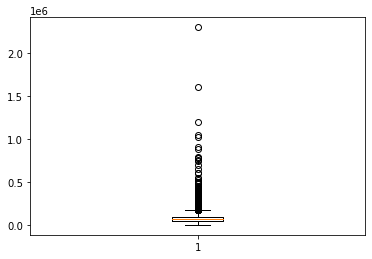

In [12]:
#Show and remove extreme outliers
plt.boxplot(loan_df["annual_income"],showfliers=True)
plt.show()


In [13]:
#Looking at the box plot for annual_income selecting only records meeting the below condition
annual_income_df = loan_df.query("annual_income<=100000")

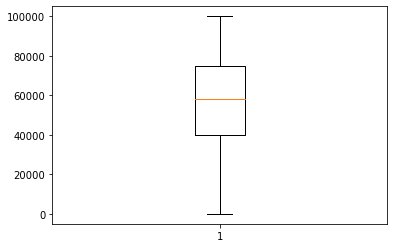

In [14]:
#box plot after removing the extreme outliers
plt.boxplot(annual_income_df["annual_income"],showfliers=True)
plt.show()


## 3.On hot encoding

In [15]:
"""
  3   homeownership                    10000 non-null  object   - ['Mortgage', 'Rent', 'Own']
  5   verified_income                  10000 non-null  object   - ['Verified', 'Not Verified', 'Source Verified']
  2   state                            10000 non-null  object  - ['NJ', 'HI', 'WI', 'PA', 'CA', 'KY', 'MI', 'AZ', 'NV', 'IL', 'FL',
                                                                   'SC', 'CO', 'TN', 'TX', 'VA', 'NY', 'GA', 'MO', 'AR', 'MD', 'NC',
                                                                   'NE', 'WV', 'NH', 'UT', 'DE', 'MA', 'OR', 'OH', 'OK', 'SD', 'MN',
                                                                   'AL', 'WY', 'LA', 'IN', 'KS', 'MS', 'WA', 'ME', 'VT', 'CT', 'NM',
                                                                   'AK', 'MT', 'RI', 'ND', 'DC', 'ID']
"""
one_hot_encoded_df = pd.get_dummies(loan_df[['homeownership','verified_income','state']])


In [16]:
one_hot_encoded_df


,homeownership_Mortgage,homeownership_Own,homeownership_Rent,verified_income_Not Verified,verified_income_Source Verified,verified_income_Verified,state_AK,state_AL,state_AR,state_AZ,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9996,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
#concatenate the one hot coded columns to the main loan_df
loan_df = pd.concat([loan_df,one_hot_encoded_df],axis=1)


## 4.Convert categorical values to numerical 

In [18]:
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()
# initial_listing_status column values are ['whole', 'fractional']
loan_df["initial_listing_status"] = class_labels.fit_transform(loan_df["initial_listing_status"].values)

class_labels = LabelEncoder()
#disbursement_method columns values are ['Cash', 'DirectPay']
loan_df["disbursement_method"]= class_labels.fit_transform(loan_df["disbursement_method"].values)

class_labels = LabelEncoder()
#application_type column values are ['individual', 'joint']
loan_df["application_type"]= class_labels.fit_transform(loan_df["application_type"].values)

class_labels = LabelEncoder()
#grade column values are ['C', 'D', 'A', 'B', 'F', 'E', 'G']
loan_df["grade"]= class_labels.fit_transform(loan_df["grade"].values)


## 5.Standardization/Normalization

In [19]:
#Standardizing/Normalizing the data
from sklearn.preprocessing import StandardScaler

#get numeric features
loan_columns = ['emp_length', 'annual_income','debt_to_income', 'delinq_2y',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'num_satisfactory_accounts', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'application_type', 'loan_amount', 'term',
       'interest_rate', 'installment', 'grade', 
       'initial_listing_status', 'disbursement_method',
       'balance', 'paid_total', 'paid_principal', 'paid_interest',
       'paid_late_fees', 'homeownership_Mortgage', 'homeownership_Own',
       'homeownership_Rent', 'verified_income_Not Verified',
       'verified_income_Source Verified', 'verified_income_Verified','month','year']

X = loan_df.loc[:,loan_columns].values
X = StandardScaler().fit_transform(X)                     #Normalizing the features
X.shape

(10000, 48)

## 6. Deal with multicollinearity (caused by 3)

In [20]:
#Deleting the original column which are now hot encoded
loan_df.drop(['homeownership','verified_income'],axis=1,inplace=True)

#Homeownership 'OWN' can be derived from other two columns created by get_dummies()
#verified_income_not_verified can be derived from other two columns created by get_dummies()
loan_df.drop(['homeownership_Own','verified_income_Not Verified'],axis=1,inplace=True)



# 3. Correlation matrix with a heatmap for the features in the dataset

In [21]:
#Load the dataset
corrMatrix_df = pd.read_csv("loans_full_schema.csv")
corrMatrix = corrMatrix_df.corr()

### Correlation matrix - Heatmap
corr() gives Pearson's correlation coefficient by default, which is linear correlation that measures the linear relationship between variables
If the relationship between the two features is closer to some linear function, then their linear correlation is stronger and the absolute value of the correlation coefficient is higher.
The color map that is used for below heatmap is 'RdBu', where dark shade of blue is postitive correlation and dark shade of red is negative correlation. Lighter shades of blue and red are very less or not correlated. Positive correlation is where if one value increases the other value increases too showing the linear correlation of line going up if we try to draw line between the scatter plot.

Positive correlation
- Correlation between the same feature is always strongly postitive which you see as all the diagonal values are 1
- num_statisfactory_accounts and total_credit_lines has strong positive correlation of 1
- num_accounts_30d_past_due and current_account_delinqs has strong positive correlation of 1
- paid_total and paid_princial has strong positive correlation of 0.99
- installment and loan_amount has positive correlation of 0.94
- balance and loan_amount has positive correlation of 0.93
- num_open_cc_accounts and open_credit_lines has positive correlation of 0.86
- annual income joint and annual income has positive correlation of 0.72
- total_credit_lines and num_total_cc_accounts has positive correlation of 0.77

Negative correlation
- months_since_last_delinque and delinq_2y has negative correlation of -0.57
- months_since_90d_late and delinq_2y has negative correlation of -0.43
- delinq_27 and account_never_delinq_percent has negavtive correlation of -0.44
- inquiries_last_12m and months_since_last_credit_inquiry has negative correlation of -0.54


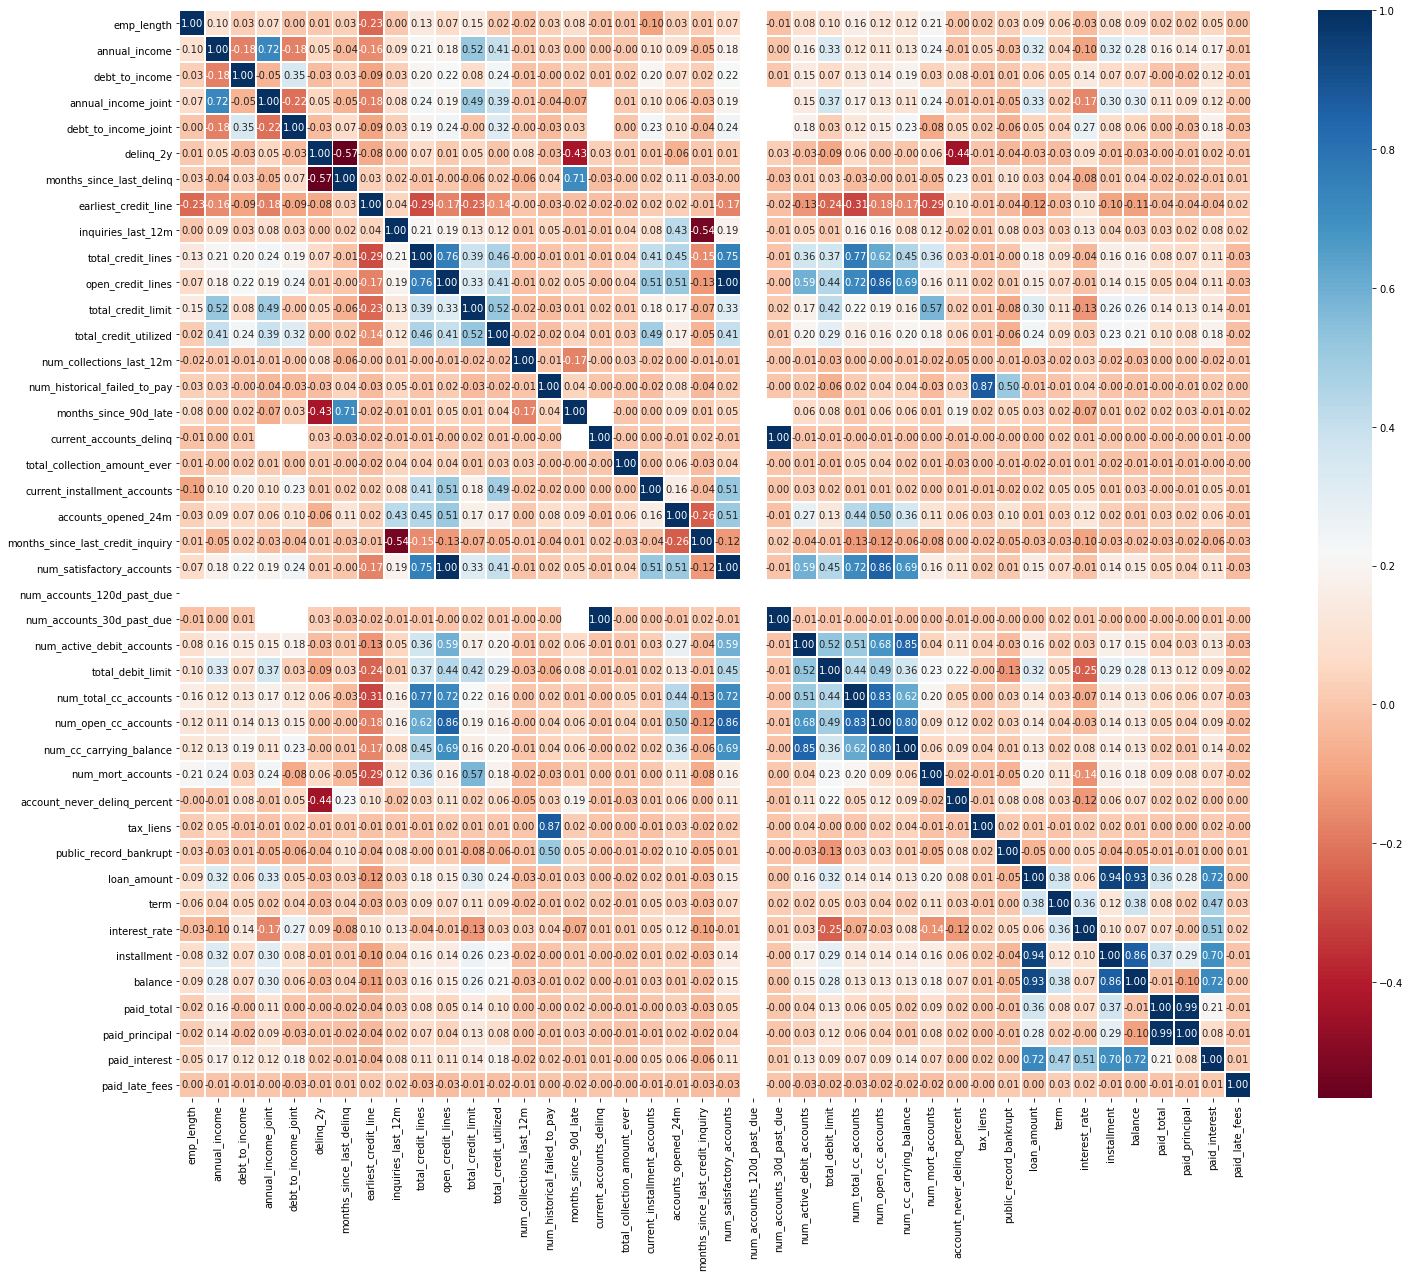

In [22]:
plt.figure(figsize=(24,20))
sns.heatmap(corrMatrix,cmap="RdBu",annot=True,linewidth=1,fmt=".2f")
plt.show()
#cmap='RdBu'
#fmt=".1f"
#linewidth=1
#linecolor='black', by defualt its white

# 4. Histogram showing the frequency of loan_amounts
- data looked right skewed
- there are lot of loans of amount 10000
- median loan_amount is 14500.0
- choosing bin size 
    - min value of loan_amount = 1000
    - max value of loan_amount = 400000
    - to make 20 bins, 40000-1000/20 = 1950
    - hence choosing interval of 2000 i.e bins = np.arange(0,44000,2000), arange the second value is exclusive hence 44000

In [23]:
loan_df["loan_amount"].median()

14500.0

[    0  2000  4000  6000  8000 10000 12000 14000 16000 18000 20000 22000
 24000 26000 28000 30000 32000 34000 36000 38000 40000 42000]


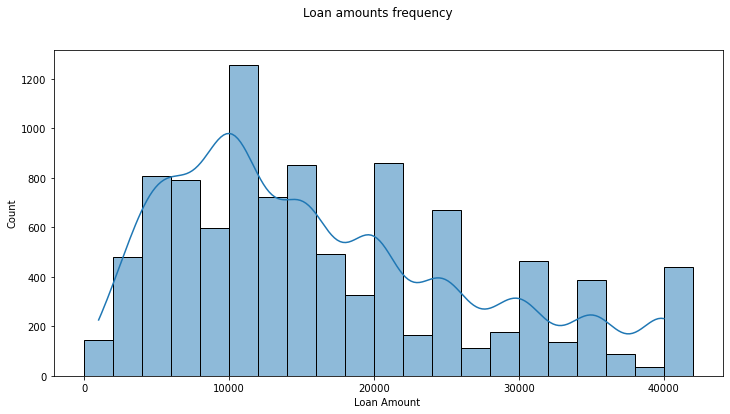

In [24]:
plt.figure(figsize=(12,6))
plt.suptitle("Loan amounts frequency")
plt.xlabel("Loan Amount ")
bins = np.arange(0,44000,2000)
print(bins)
sns.histplot(x='loan_amount',data=loan_df,bins=bins,kde=True)
plt.show()

 ### 5. Create a new column region - (Pacific,Plains,Midwest,Northeast and South) using lambda
 looking at above elasped time in below code
 - using map with regular function call is the fastest way 
 - using lambda function is the second fastest 
 - using lambda with regular function call is the the slowest


In [39]:

regions = {'Pacific':['OR','AK','HI','WA','CA'],
          'Midwest':['NE','MN','MO','WI','IL','MI','IN','OH'],
          'South':['TX','AR','LA','KY','TN','MS','AL','WV','MD','DE','VA','NC','SC','GA','FL','DC'],
          'Northeast':['ME','VT','NH','NY','PA','NJ','CT','MA','RI'],
          #'Mountain':['UT','CO','AZ','NM','MT','ID','WY','NV'],
          'Plains':['KS','IA','ND','SD','OK']}

def get_regionByState(state):
    if state in regions['Pacific']:
        return 'Pacific'
    elif state in regions['Midwest']:
        return 'Midwest'
    elif state in regions['South']:
        return 'South'
    elif state in regions['Northeast']:
        return 'Northeast'
    elif state in regions['Plains']:
        return 'Plains'
    else:
        return 'Mountain'


In [26]:
#lambda function
region_of_state=(lambda x: "Plains"  if x in regions['Plains'] else 
                          ("Midwest" if x in regions['Midwest'] else 
                          ("Pacific" if x in regions['Pacific'] else 
                          ("South" if x in regions['South'] else 
                          ("Northeast" if x in regions['Northeast'] else
                          "Mountain")))))


In [40]:
#test the regular function
print(get_regionByState('WA'))
print(get_regionByState('CO'))
#Lambda function
region_of_state('WA')
region_of_state('CO')

Pacific
Mountain


'Mountain'

In [41]:
import time
#to check the performance of code without using lambda
start = time.perf_counter()
region_df['region'] = region_df.state.map(get_regionByState) 
end = time.perf_counter()
withoutlambda_elapsed_time = end - start
print("map_elapsed_time",withoutlambda_elapsed_time)

map_elapsed_time 0.014383999999949992


In [42]:
#to check the performance of code using lambda function
start = time.perf_counter()
region_df['region1'] = region_df.state.map(region_of_state) 
end = time.perf_counter()
lambda_func_elapsed_time = end - start
print("lambda_func_elapsed_time",lambda_func_elapsed_time)

lambda_func_elapsed_time 0.019125900000062757


In [43]:
#to check the performance of code using lambda and calling regular function
start = time.perf_counter()
region_df['region2'] = region_df.apply(lambda x: get_regionByState(x['state']),axis=1)
end = time.perf_counter()
lambda_regular_func_elapsed_time = end - start
print("lambda_regular_func_elapsed_time",lambda_regular_func_elapsed_time)

lambda_regular_func_elapsed_time 0.19987249999996948


In [31]:
#compare values of region created using without using lambda and region1 created using lambda
region_df[['state','region','region1','region2']]

,state,region,region1,region2
0,NJ,Northeast,Northeast,Northeast
1,HI,Pacific,Pacific,Pacific
2,WI,Midwest,Midwest,Midwest
3,PA,Northeast,Northeast,Northeast
4,CA,Pacific,Pacific,Pacific
...,...,...,...,...
9995,TX,South,South,South
9996,PA,Northeast,Northeast,Northeast
9997,CT,Northeast,Northeast,Northeast
9998,WI,Midwest,Midwest,Midwest


# 6. Histograms to show if loan-amounts differ by region. Summerize your findings
- South region has more loans
- Mountain region has the least number of loans
- northeast,pacific and midwest have similar trends 
- Plains region has less loans
- loan_amount is right skewed,with high at 10000

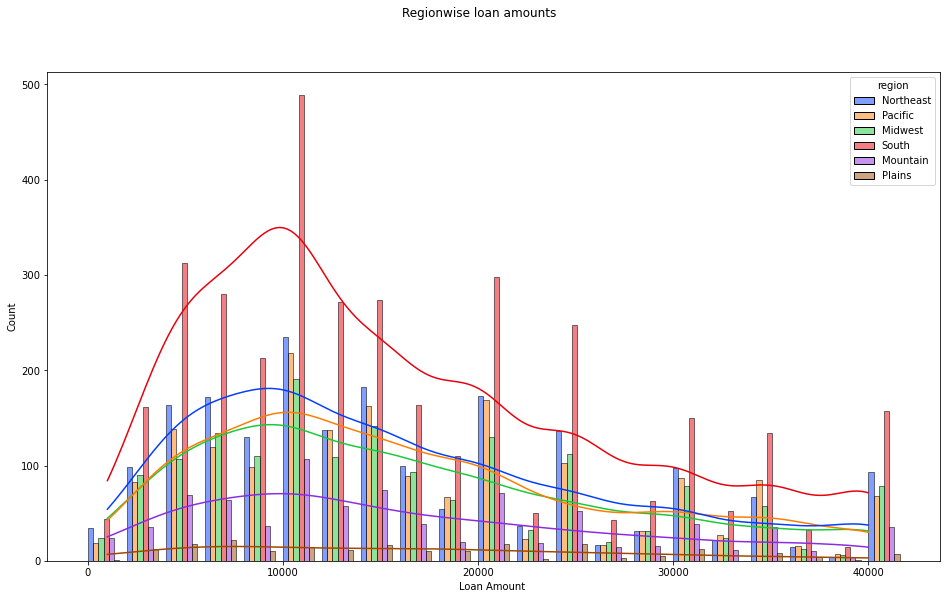

In [32]:
plt.figure(figsize=(16,9))
plt.suptitle("Regionwise loan amounts")
plt.xlabel("Loan Amount ")
bins = np.arange(0,44000,2000)
sns.histplot(x='loan_amount',data=region_df,bins=bins,kde=True,
             hue="region",multiple="dodge",palette="bright",shrink=0.8)
plt.show()
#binwidth=10
#binrange=(30,60)
#multiple='layer', 'dodge'
#shrink=0.8 for dodge style

In [33]:

tst_df = region_df.groupby("region")["loan_amount"].value_counts()
pd.DataFrame(tst_df)


loan_amount
region  loan_amount             
Midwest 10000                150
        20000                105
        15000                 99
        40000                 78
        12000                 71
...                          ...
South   39000                  1
        39275                  1
        39400                  1
        39425                  1
        39825                  1

[1193 rows x 1 columns]

In [ ]:
'''
 
 38  loan_purpose                      10000 non-null  object   - ['moving', 'debt_consolidation', 'other', 'credit_card',
                                                                   'home_improvement', 'medical', 'house', 'small_business', 'car',
                                                                   'major_purchase', 'vacation', 'renewable_energy']
 45  sub_grade                         10000 non-null  object   - ['C3', 'C1', 'D1', 'A3', 'C2', 'B5', 'C4', 'B2', 'B1', 'D3', 'F1',
                                                                   'E5', 'A2', 'A5', 'A4', 'A1', 'D4', 'D5', 'B3', 'D2', 'E1', 'G1',
                                                                   'B4', 'C5', 'E2', 'E4', 'F3', 'E3', 'F5', 'F2', 'F4', 'G4']
 47  loan_status                       10000 non-null  object   - ['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
                                                                   'Charged Off', 'Late (16-30 days)']
'''
